# Song prediction case study

## Setup

In [114]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pylab as plt
from pathlib import Path
from sklearn.model_selection import train_test_split

In [115]:
mpl.style.use("seaborn-colorblind")

In [118]:
root_path = Path().cwd().parent
data_path = root_path/"data/raw/"

## Load data

In [35]:
df = pd.read_csv(data_path/"YearPredictionMSD.txt")

In [37]:
df.shape

(515344, 91)

### Apply schema
Naming according to [authors](https://archive.ics.uci.edu/ml/datasets/YearPredictionMSD) *attribute information*  
"In simple terms, timbre is what makes a particular musical instrument or human voice have a different sound from another, even when they play or sing the same note" ([Wikipedia on Timbre](https://en.wikipedia.org/wiki/Timbre))

In [107]:
schema = ["year"] + [f"feat_{n}" for n in range(df.shape[1] -1)]

In [108]:
df.columns = schema

In [109]:
df.head()

,year,feat_0,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,...,feat_80,feat_81,feat_82,feat_83,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89
492761,1989,45.98989,68.43731,50.71155,12.69610,-43.02829,-1.69011,-9.38475,2.41818,12.58953,...,17.26491,-95.97911,87.46539,61.98300,8.39552,241.97244,-5.14548,20.30374,-43.70390,1.05995
512364,2004,40.31978,-70.94339,-19.82559,-15.23644,2.61526,-8.95776,-5.80873,-14.96032,13.77726,...,56.79234,112.32934,13.20738,81.58860,15.49371,-28.47310,42.80386,-7.48103,29.19382,-10.63088
492093,2002,48.05087,8.32131,13.66158,0.42081,-9.20881,-19.03846,10.22317,3.47998,4.24750,...,-11.60396,-6.18185,-22.16438,26.41713,-8.63388,31.18811,-56.90665,1.22820,32.77897,-21.29104
510018,2006,47.66160,95.17150,32.03878,2.08911,7.10107,1.01328,-18.63926,12.62359,-3.05738,...,72.88870,-93.20476,-26.22317,32.07740,24.47677,54.15103,-40.61581,-7.03403,84.28672,-14.27650
507081,2009,38.39726,-0.55448,-48.99193,13.71702,20.44900,-22.19534,-3.55578,-3.80980,7.56424,...,7.96680,-303.37895,-136.14488,-49.60629,-36.48533,-169.50798,452.20295,-15.52135,386.24821,21.98469


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515344 entries, 0 to 515343
Data columns (total 91 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   year     515344 non-null  int64  
 1   feat_0   515344 non-null  float64
 2   feat_1   515344 non-null  float64
 3   feat_2   515344 non-null  float64
 4   feat_3   515344 non-null  float64
 5   feat_4   515344 non-null  float64
 6   feat_5   515344 non-null  float64
 7   feat_6   515344 non-null  float64
 8   feat_7   515344 non-null  float64
 9   feat_8   515344 non-null  float64
 10  feat_9   515344 non-null  float64
 11  feat_10  515344 non-null  float64
 12  feat_11  515344 non-null  float64
 13  feat_12  515344 non-null  float64
 14  feat_13  515344 non-null  float64
 15  feat_14  515344 non-null  float64
 16  feat_15  515344 non-null  float64
 17  feat_16  515344 non-null  float64
 18  feat_17  515344 non-null  float64
 19  feat_18  515344 non-null  float64
 20  feat_19  515344 non-null  

## Split into training/validation/test set
Splitting according to instruction given by [authors](https://archive.ics.uci.edu/ml/datasets/YearPredictionMSD#) in order to avoid *producer effect*

In [71]:
train_df = df.iloc[:463715]

In [78]:
remaining_df = df.iloc[463715:]

In [79]:
train_df.shape[0] + remaining_df.shape[0] == df.shape[0]

True

In [84]:
valid_df, test_df = train_test_split(remaining_df, test_size=0.1, random_state=1337)

In [85]:
for df in [train_df, valid_df, test_df]:
    print(df.shape)

(463715, 91)
(46466, 91)
(5163, 91)


In [166]:
train_df.to_csv(data_path/"train.csv", index=False, header=True)

In [167]:
valid_df.to_csv(data_path/"valid.csv", index=False, header=True)

In [168]:
test_df.to_csv(data_path/"test.csv", index=False, header=True)

## Exploration

In [130]:
train_df['year'].nunique()

89

In [131]:
train_df["year"].value_counts(normalize=False)

2007    35376
2006    33824
2005    31454
2008    31244
2009    27907
        ...  
1925        7
1922        6
1933        6
1924        5
2011        1
Name: year, Length: 89, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4c34331278>]],
      dtype=object)

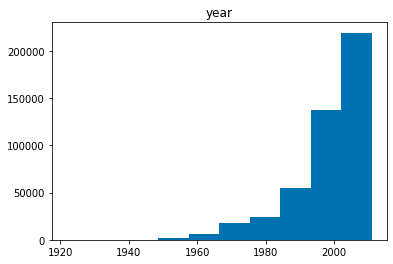

In [138]:
train_df.hist(column="year", grid=False, bins=10)

In [149]:
def classify_decade(year: int):
    if year >= 1950 and year < 1960:
        return "fifties"
    elif year >= 1960 and year < 1970:
        return "sixties"
    elif year >= 1970 and year < 1980:
        return "seventies"
    elif year >= 1980 and year < 1990:
        return "eighties"
    elif year >= 1990 and year < 2000:
        return "nineties"
    elif year >= 2000:
        return "millenium"
    else:
        return "forties or older"

In [158]:
train_df["decade"] = train_df["year"].apply(classify_decade)

In [161]:
train_df["decade"].value_counts(normalize=True)

millenium           0.598389
nineties            0.241814
eighties            0.081112
seventies           0.048196
sixties             0.022801
fifties             0.006096
forties or older    0.001591
Name: decade, dtype: float64

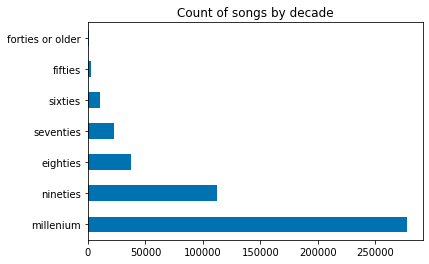

In [165]:
train_df["decade"].value_counts().plot(kind="barh", title="Count of songs by decade")

In [113]:
# Need to use librosa to visualize timbre features